## 01 Python Libraries

In [2]:
from datetime import datetime
from tqdm import tqdm
import pandas as pd
import numpy as np
import glob
import os
import gzip

## 02a Reading and Loading the Darpa dataset from raw text format

In [372]:


# Define the days of the week
days_of_week = ["monday7", "tuesday7", "wednesday7", "thursday7", "friday7"]

# Initialize an empty list to store the contents of the files
merged_list = []

# Iterate through each day's folder
for day in days_of_week:
    folder_path = f"./{day}/"  # Update the path according to your directory structure

    # Check if the folder exists
    if os.path.exists(folder_path):
        # Read the contents of bcm.list.gz file
        bcm_file_path = os.path.join(folder_path, "bcm.list.gz")
        if os.path.exists(bcm_file_path):
            with gzip.open(bcm_file_path, "rt") as bcm_file:
                merged_list.extend(bcm_file.readlines())

        # Read the contents of tcpdump.list.gz file
        tcpdump_file_path = os.path.join(folder_path, "tcpdump.list.gz")
        if os.path.exists(tcpdump_file_path):
            with gzip.open(tcpdump_file_path, "rt") as tcpdump_file:
                merged_list.extend(tcpdump_file.readlines())

# Save the merged list to a file named "week2_data.txt"
output_file_path = "week7_data.txt"
with open(output_file_path, "w") as output_file:
    output_file.writelines(merged_list)

print(f"Merged list saved to {output_file_path}")


Merged list saved to week7_data.txt


In [373]:
import pandas as pd

# Load data from week1_data.txt
week1_file_path = "week1_data.txt"
with open(week1_file_path, "r") as week1_file:
    week1_data = week1_file.readlines()

# Load data from week2_data.txt
week2_file_path = "week2_data.txt"
with open(week2_file_path, "r") as week2_file:
    week2_data = week2_file.readlines()

# Load data from week3_data.txt
week3_file_path = "week3_data.txt"
with open(week3_file_path, "r") as week3_file:
    week3_data = week3_file.readlines()
    
# Load data from week4_data.txt
week4_file_path = "week4_data.txt"
with open(week4_file_path, "r") as week4_file:
    week4_data = week4_file.readlines()
    

# Load data from week5_data.txt
week5_file_path = "week5_data.txt"
with open(week5_file_path, "r") as week5_file:
    week5_data = week5_file.readlines()

# Load data from week6_data.txt
week6_file_path = "week6_data.txt"
with open(week6_file_path, "r") as week6_file:
    week6_data = week6_file.readlines()
    
# Load data from week7_data.txt
week7_file_path = "week7_data.txt"
with open(week7_file_path, "r") as week7_file:
    week7_data = week7_file.readlines()
    
# Merge the two lists
data_full_7wks = week1_data + week2_data + week3_data + week4_data + week5_data + week6_data +week7_data

# Save the merged data to a text file
output_txt_path = "data_full_7wks.txt"
with open(output_txt_path, "w") as output_txt:
    output_txt.writelines(data_full_7wks)

print(f"data_full_7wks data saved to {output_txt_path}")



data_full_7wks data saved to data_full_7wks.txt


In [374]:
len(data_full_7wks)

3000794

### 02b Converting processed data into CSV

In [4]:
# Read merged_data.txt into a DataFrame
merged_data_file = "dataset_7weeks.txt"
df_full = pd.read_csv(merged_data_file, delim_whitespace=True, header=None)

# Select specific columns from df_full, not df
df_full = df_full.iloc[:, [1,2,3,4,5,6,7,8,9]]

# Rename columns
df_full.columns = ['date', 'time', 'duration', 'server', 'sourcePort', 'destinationPort','srcIP','destIP', 'anomaly']

# Print the resulting DataFrame
df_full


FileNotFoundError: [Errno 2] No such file or directory: 'dataset_7weeks.txt'

In [376]:

# Read merged_data.txt into a DataFrame
#merged_data_file = "data_1_2.txt"
merged_data_file = "data_full_7wks.txt"

df = pd.read_csv(merged_data_file, delim_whitespace=True, header=None)

# Select specific columns
df = df.iloc[:, [1, 2, 5, 6, 9]]

# Rename columns
df.columns = ['date', 'time', 'source', 'destination', 'anomaly']

# Print the resulting DataFrame
df


/Users/anthonyekle/tensorflow-test/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,date,time,source,destination,anomaly
0,06/02/1998,00:00:07,2127,80,0
1,06/02/1998,00:00:07,2139,80,0
2,06/02/1998,00:00:07,2128,80,0
3,06/02/1998,00:00:07,2129,80,0
4,06/02/1998,00:00:07,2130,80,0
...,...,...,...,...,...
3000789,07/18/1998,05:27:45,-,-,0
3000790,07/18/1998,05:27:45,-,-,0
3000791,07/18/1998,05:37:45,-,-,0
3000792,07/18/1998,05:38:40,1020,514,0


In [377]:
print(df[1:2])

         date      time source destination  anomaly
1  06/02/1998  00:00:07   2139          80        0


## 03 Visualizing   dataset and feature engineering

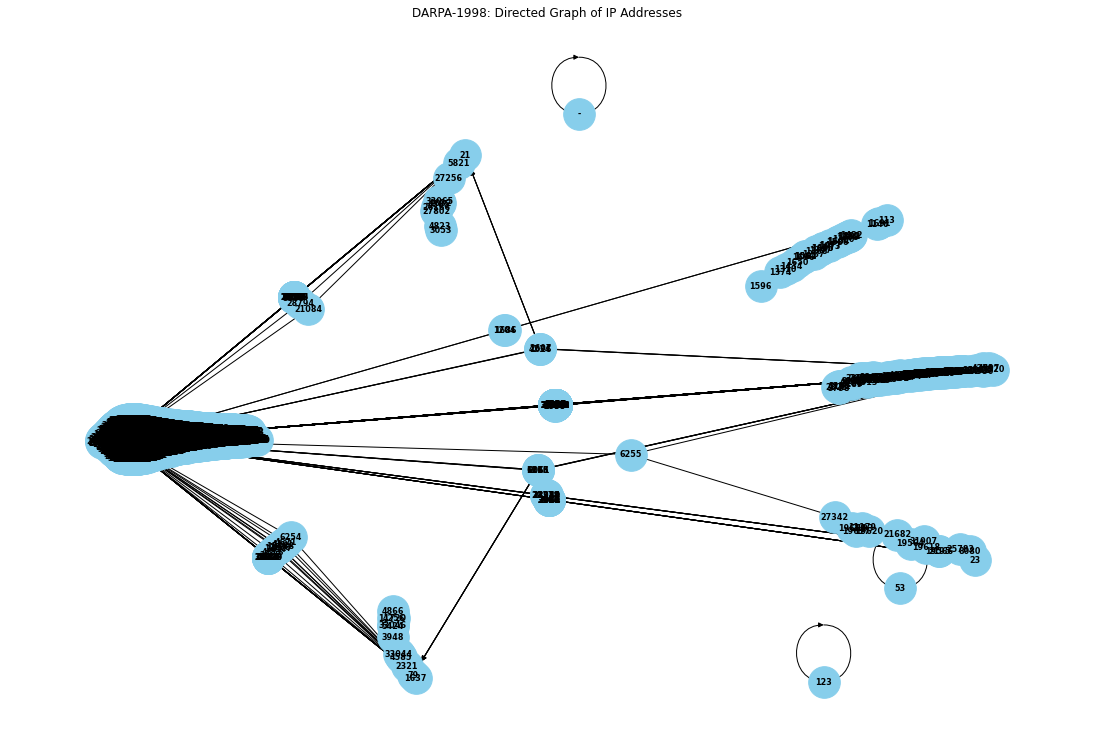

In [56]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame named 'df'
# If not, load the dataset as described in the previous responses

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph using the 'source' and 'destination' columns
for _, row in df[0:9000].iterrows():
    G.add_edge(row['source'], row['destination'])

# Plot the directed graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G)  # You can choose a different layout algorithm
nx.draw(G, pos, with_labels=True, font_size=8, node_size=1000, font_color="black", font_weight="bold", node_color="skyblue", arrowsize=10)

plt.title("DARPA-1998: Directed Graph of IP Addresses")
# Save the figure
plt.savefig("DARPA_directed_graph.png")
plt.show()



In [378]:
# exclude collapsing data
tcp = df
tcp = tcp[tcp.date != '07/32/1998']

# acquire datetime information
tcp['date_time'] = pd.to_datetime(tcp['date'] + ' ' + tcp['time'], errors='coerce', format='%m/%d/%Y %H:%M:%S')
tcp = tcp.drop(['date', 'time'], axis=1)


In [379]:
# exclude collapsing data
tcp = df
tcp = tcp[tcp.date != '07/32/1998']

# acquire datetime information
tcp['date_time'] = tcp['date'] + ' ' + tcp['time']
tcp = tcp.drop('date', axis=1)
tcp = tcp.drop('time', axis=1)
tcp['date_time'] = pd.to_datetime(tcp['date_time'],errors='coerce',  format='%m/%d/%Y %H:%M:%S')

In [380]:
tcp.anomaly.value_counts()

1    1856498
0    1144296
Name: anomaly, dtype: int64

In [381]:
tcp

,source,destination,anomaly,date_time
0,2127,80,0,1998-06-02 00:00:07
1,2139,80,0,1998-06-02 00:00:07
2,2128,80,0,1998-06-02 00:00:07
3,2129,80,0,1998-06-02 00:00:07
4,2130,80,0,1998-06-02 00:00:07
...,...,...,...,...
3000789,-,-,0,1998-07-18 05:27:45
3000790,-,-,0,1998-07-18 05:27:45
3000791,-,-,0,1998-07-18 05:37:45
3000792,1020,514,0,1998-07-18 05:38:40


In [382]:
# calculate how many hours passed since the initial time
initial_time = tcp['date_time'].min()
tcp['date_time'] = tcp['date_time'] - initial_time
tcp['hours_past'] = tcp['date_time'].dt.days * 24 + tcp['date_time'].dt.seconds//3600
tcp = tcp.drop('date_time', axis=1)
tcp = tcp.sort_values('hours_past')


In [383]:
tcp.hours_past.fillna(0, inplace=True)
# Remove rows with '-' values across the entire DataFrame
tcp = tcp.replace('-', pd.NA).dropna()
len(tcp)

2793445

In [389]:
# Search for special characters in the column
special_char_rows = tcp[tcp['source'].astype(str).str.contains('[^0-9]')]
special_char_rows2 = tcp[tcp['destination'].astype(str).str.contains('[^0-9]')]

# Display the DataFrame with rows containing special characters
print(special_char_rows)
print(special_char_rows2)

Empty DataFrame
Columns: [source, destination, anomaly, hours_past]
Index: []
        source destination  anomaly  hours_past
477972   49724     customs        1       397.0


In [391]:
# remove such rows
#tcp.loc[477972]

# Remove the row with index 49724
tcp = tcp.drop(477972, axis=0)

In [392]:
# Convert the column to integers
tcp['source'] = tcp['source'].apply(lambda x: int(''.join(char for char in str(x) if char.isdigit())))
tcp['destination'] = tcp['destination'].apply(lambda x: int(''.join(char for char in str(x) if char.isdigit())))

# Search for special characters in the column
special_char_rows = tcp[tcp['source'].astype(str).str.contains('[^0-9]')]
special_char_rows2 = tcp[tcp['destination'].astype(str).str.contains('[^0-9]')]

# Display the DataFrame with rows containing special characters
print(special_char_rows)
print(special_char_rows2)

Empty DataFrame
Columns: [source, destination, anomaly, hours_past]
Index: []
Empty DataFrame
Columns: [source, destination, anomaly, hours_past]
Index: []


In [393]:
tcp.destination

3824        80
2742        80
2743        80
2744        80
2745        80
          ... 
2750458    123
2750455    123
2750452    123
2750451    123
2750464     53
Name: destination, Length: 2793443, dtype: int64

In [394]:
tcp

,source,destination,anomaly,hours_past
3824,21530,80,0,0.0
2742,10845,80,0,0.0
2743,10844,80,0,0.0
2744,10863,80,0,0.0
2745,10864,80,0,0.0
...,...,...,...,...
2750458,123,123,0,1149.0
2750455,123,123,0,1149.0
2750452,123,123,0,1149.0
2750451,123,123,0,1149.0


In [395]:
# Find rows where the special character is present in any column
rows_with_special_char = tcp[tcp.applymap(lambda x: '<' in str(x)).any(axis=1)]

# Display the rows with the special character
print(rows_with_special_char)



Empty DataFrame
Columns: [source, destination, anomaly, hours_past]
Index: []


In [396]:
graphs = tcp.loc[:, ['source', 'destination', 'hours_past']]
graphs = graphs.values

In [397]:
len(graphs)

2793443

## 04  SpotLight Algorithm in python

In [398]:
class SpotLight:
    def __init__(self, graphs):
        '''
        input should be Nx3 array. (N: number of total edges)
        first column: source node
        second column: destination node
        third column: timestamp
        '''
        self.graphs = graphs
        self.timestamps = np.unique(graphs[:,2])
        self.num_of_timestamp = self.timestamps.shape[0]

    def sketch(self, K=50, p=0.2, q=0.2):
        '''
        K: number of subgraphs
        p: source sampling probability
        q: destination sampling probability
        '''
        sketched_vectors = np.empty((0, K), int)
        for i in tqdm(range (self.num_of_timestamp)):
            sketched_vector = np.empty((0, K), int)
            graph = self.graphs[self.graphs[:, 2] == (self.timestamps[i])]
            self.source_nodes = np.unique(graph[:,0]).reshape((-1, 1))
            self.dest_nodes = np.unique(graph[:,1]).reshape((-1, 1))
            self.hashing(K, p, q)
            for j in range(graph.shape[0]):
                source = graph[j, 0]
                dest = graph[j, 1]
                sources_are_in_subgraphs = (self.subgraphs_source[self.subgraphs_source[:, 0] == source])[:,1:]
                dests_are_in_subgraphs = (self.subgraphs_dest[self.subgraphs_dest[:, 0] == dest])[:,1:]
                sketched_vector = np.append(sketched_vector, sources_are_in_subgraphs * dests_are_in_subgraphs, axis=0)
            sketched_vector = np.sum(sketched_vector, axis=0).reshape((1, K))
            sketched_vectors = np.append(sketched_vectors, sketched_vector, axis=0)
        return sketched_vectors
        

    def hashing(self, K, p, q):
        self.subgraphs_source = np.random.choice([0,1], [self.source_nodes.shape[0], K], p = [1-p, p])
        self.subgraphs_source = np.concatenate((self.source_nodes, self.subgraphs_source), axis=1)
        self.subgraphs_dest = np.random.choice([0,1], [self.dest_nodes.shape[0], K], p = [1-q, q])
        self.subgraphs_dest = np.concatenate((self.dest_nodes, self.subgraphs_dest), axis=1)

In [399]:
# sketching tcodump data to spotlight space.
SL = SpotLight(graphs)
v_g = SL.sketch(50, 0.2, 0.2)

100%|██████████████████████████████████████████████████████████████████████| 730/730 [1:11:03<00:00,  5.84s/it]


In [400]:
v_g.shape

(730, 50)

In [410]:
# Convert the NumPy array to a Pandas DataFrame
spotligh_space = pd.DataFrame(v_g)
# Save the DataFrame to a CSV file
spotligh_space.to_csv('spotlight_space.csv', index=False)


## 04a Anomaly Score with Isolation Forest

In [435]:
# anomaly detection based on Isolation Forest
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=100, max_samples=80, contamination=0.4)
clf.fit(v_g)
detected = clf.score_samples(v_g)
detected = detected * -1

In [436]:
# groupby timestamp, timestamps which contain more than 1000 anomalous communication are anomalous timestamps
truth = tcp.groupby('hours_past').sum()
truth = ((truth.anomaly.values > 1000)*1)

In [437]:
len(truth)

730

In [448]:
len(detected)

730

In [439]:
from sklearn.metrics import precision_recall_curve, auc
precision_1, recall_1, thresholds = precision_recall_curve(truth, detected)
print('Area Under Curve:', auc(recall_1, precision_1))

Area Under Curve: 0.8545218774604009


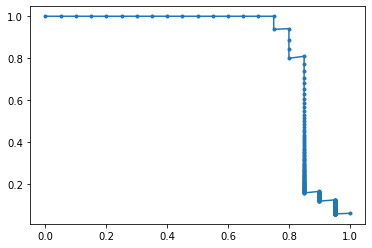

In [440]:
# draw recall precision curve
from matplotlib import pyplot
%matplotlib inline
pyplot.plot(recall_1, precision_1, marker='.')

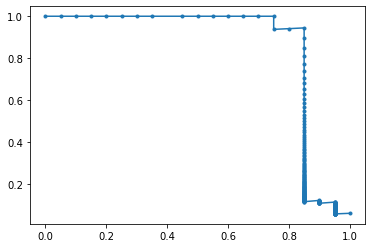

In [408]:
# draw recall precision curve
from matplotlib import pyplot
%matplotlib inline
pyplot.plot(recall, precision, marker='.')
# Save the plot
pyplot.savefig('recall_precision_curve.png')

# Display the plot
pyplot.show()

## 4b Random Cut Trees.

In [441]:
from sklearn.ensemble import RandomTreesEmbedding
# Build the Random Cut Trees model

# RandomTreesEmbedding is used here, but it's essentially a Random Cut Trees model.
rct_model = RandomTreesEmbedding(n_estimators=100, max_depth=10, random_state=42)
rct_model.fit(v_g)
#detected = rct_model.score_samples(v_g)
#detected = detected * -1
# Use decision_function for scoring
decision_scores = rct_model.apply(v_g).sum(axis=1)

# Convert decision scores to anomaly scores (multiply by -1 to obtain positive scores)
#anomaly_scores = -decision_scores
anomaly_scores = decision_scores * 1
# Print the anomaly scores
print("Anomaly Scores:")
print(anomaly_scores)

Anomaly Scores:
[ 3164  4228  4072  3697  5442  4409  3741  3611  3752  1669  2971  1064
  1059  1011  1203  1000  1713  1000  1340  1085  1836  1013  1692  4691
  4602  4911  4170  3710  2771  2491  2193  3096  1113  1204  1021  1023
  1000  1179  1000  1000  1000  1054  2157  3675  3682  2574  1986  5369
  5892  4707  4388  4721  2429  2780  1310  1503  1106  1146  1165  1000
  1246  1487  1013  1043  1000  1000  1779  4433  4044  5546  3319  4042
  4032  4008  3785  1809  2583  1370  1005  1000  1000  1000  1007  1013
  1026  1000  1181  1133  1000  1013  2136  3796  4052  2460  3470  4127
  2445  3965  3184  2731  1863  1175  1171  1000  1000  1013  1000  1000
  1007  1000  1013  1000  1000  1495  2627  3664  4032  2880  2825  4485
  3360  5303  2858  1259  1421  1498  1000  1007  1013  1000  1766  1000
  1000  1000  1000  1000  2519  3990  4370  4331  5975  6038  4001  3513
  4880  1938  1927  2904  1657  1013  1013  1000  1173  1488  1000  1000
  1050  1013  1013  1000  3457  332

In [443]:
from sklearn.metrics import precision_recall_curve, auc
precision_2, recall_2, thresholds = precision_recall_curve(truth, anomaly_scores)
print('Area Under Curve:', auc(recall_2, precision_2))

Area Under Curve: 0.8692164633495447


## 05 Comparing IsolatedForest vs RandomCutTree for Anomaly Detection

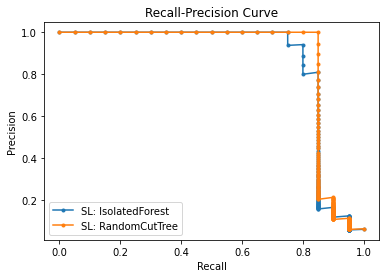

In [447]:
from matplotlib import pyplot

# Assuming you have the data for recall and precision in the variables recall_1, precision_1, recall_2, precision_2

# Plot the first set of recall-precision data
pyplot.plot(recall_1, precision_1, marker='.', label='SL: IsolatedForest')

# Plot the second set of recall-precision data
pyplot.plot(recall_2, precision_2, marker='.', label='SL: RandomCutTree')

# Label the x-axis
pyplot.xlabel('Recall')

# Label the y-axis
pyplot.ylabel('Precision')

# Add a title to the plot
pyplot.title('Recall-Precision Curve')

# Display a legend indicating which line corresponds to which model
pyplot.legend()

# Save the plot (you can uncomment this line if you want to save the plot as an image file)
pyplot.savefig('03_recall_precision_curve_both.png')

# Display the plot
pyplot.show()
